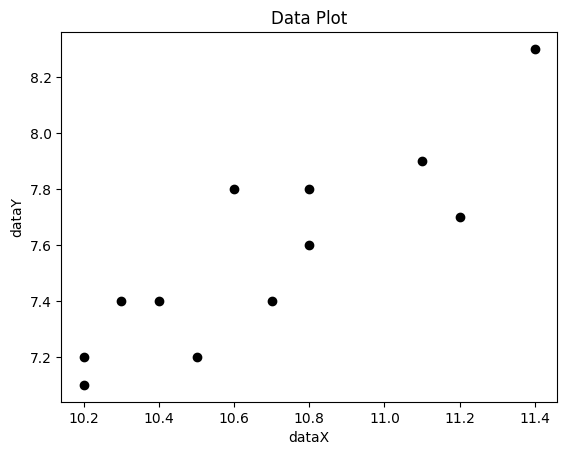

r value calculated by hand: 0.8704
r value calculated by built-in function: 0.8704
Standard error: 0.1557
95% Confidence Interval: [0.6812 1.9879]
t statistic: 5.5893
Critical t values: [-2.2281 2.2281]
lambda value: 1.0848
Power (approximate): 0.9795
Sample size (current): 12.0000


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# %% Parametric Correlation Coefficients
# %% Question 1
# They do look to be related in some positive fashion (positive slope between
# data sets)

# Load and plot data
dataX = np.array([10.4000, 10.8000, 11.1000, 10.2000, 10.3000, 10.2000, 10.7000, 10.5000, 10.8000, 11.2000, 10.6000, 11.4000])
dataY = np.array([7.4000, 7.6000, 7.9000, 7.2000, 7.4000, 7.1000, 7.4000, 7.2000, 7.8000, 7.7000, 7.8000, 8.3000])
plt.plot(dataX, dataY, 'ko', linewidth=2)
plt.xlabel('dataX')
plt.ylabel('dataY')
plt.title('Data Plot')
plt.show()

# %% Question 2
# The answers between the two approaches are the same

# Calculate the corrcoef by hand
n = len(dataX)
xBar = 1/n * np.sum(dataX)
yBar = 1/n * np.sum(dataY)

num = np.sum((dataX - xBar) * (dataY - yBar))
denom = np.sqrt(np.sum((dataX-xBar)**2)) * np.sqrt(np.sum((dataY-yBar)**2))
r = num/denom
print(f'r value calculated by hand: {r:.4f}')

# Calculate the corrcoef using the built-in function
r_Fxn = np.corrcoef(dataX, dataY)
print(f'r value calculated by built-in function: {r_Fxn[0, 1]:.4f}')

# %% Question 3

# Calculate the standard error and 95% CI
s_r = np.sqrt((1-r**2) / (n-2))
z_r = 0.5 * np.log((1+r) / (1-r))
s_z = np.sqrt((1) / (n-3))
confLevel = 0.95
zCrit = norm.ppf((1-confLevel)/2)
confInterval = [(z_r + zCrit * s_z), (z_r - zCrit * s_z)]
print(f'Standard error: {s_r:.4f}')
print(f'95% Confidence Interval: [{confInterval[0]:.4f} {confInterval[1]:.4f}]')

# %% Question 4
# The value should be considered significant since the calculated test statistic
# t is of a greater magnitude than the calculated critical values.

# Hypothesis Testing r = 0
t_stat = r/s_r
alpha = 0.05
df = n-2
pLower = alpha/2
pUpper = 1-alpha/2
tCrit = t.ppf([pLower, pUpper], df)
print(f't statistic: {t_stat:.4f}')
print(f'Critical t values: [{tCrit[0]:.4f} {tCrit[1]:.4f}]')

# %% Question 5
# Yale's study is functionally the same as mine since the calculated lambda
# value is not large enough to reject the null of them being equal. Note: We used
# an approximate normal test here.

# Hypothesis Testing r = r_s
rs = 0.75
s_rs = np.sqrt((1-rs**2) / (n-2)) # This appears to be unused in the original code after this line
z_rs = 0.5 * np.log((1+rs) / (1-rs))
lambda_val = (z_r - z_rs) / np.sqrt((1) / (n - 3))
print(f'lambda value: {lambda_val:.4f}')

# %% Question 6

# Power and sample size calculation
target = 0.5
null = 0
# In Python, we can use libraries like 'statsmodels' or 'scipy.stats.power' for power calculations.
# The 'sampsizepwr' function in MATLAB is not directly replicated in a single scipy function.
# For a t-test for correlation, we can use the t-distribution based approach.

# This is an approximation based on Fisher's z-transformation, similar to the MATLAB approach
# For a more precise power calculation, dedicated libraries would be needed.
effect_size = z_r - 0.5 * np.log((1+null) / (1-null)) # Fisher's z for the effect size
power = 1 - norm.cdf(norm.ppf(1 - 0.05/2) - effect_size * np.sqrt(n - 3)) + \
        norm.cdf(norm.ppf(0.05/2) - effect_size * np.sqrt(n - 3)) # Two-sided test power

# Sample size calculation is more involved and often requires iterative methods or specific functions
# A direct translation of sampsizepwr for sample size for a correlation t-test is not straightforward in scipy.
# The following is a placeholder or a simplified approximation.
# For a specific target power and effect size, you would typically solve for n.
# This part would require a dedicated power analysis library or a more complex implementation.
# As a simplified example, we can show the current sample size.
nout = n # Placeholder, as direct calculation is complex without a specific function

print(f'Power (approximate): {power:.4f}')
print(f'Sample size (current): {nout:.4f}')